# Titnaic - Machine Learning From Disaster

## Importing data and Introduction 

In [1]:
import pandas as pd

In [2]:
import warnings
from pandas.errors import PerformanceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=PerformanceWarning)

In [3]:
train_df = pd.read_csv('Dataset/train.csv')
test_df = pd.read_csv('Dataset/test.csv')

In [4]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

## EDA

In [5]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
test_df_copy.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Preprocessing

### Preprocessing Train Inputs and Train Targets

In [7]:
import numpy as np

In [8]:
columns_drop = ['Name', 'Cabin', 'Ticket', 'PassengerId'] 
train_df_copy = train_df_copy.drop(columns_drop, axis=1)
train_df_copy = train_df_copy.dropna(subset=['Embarked'])


In [9]:
column_to_exclude = 'Survived'
train_inputs = train_df_copy[train_df_copy.columns.difference([column_to_exclude])]
train_targets = train_df_copy['Survived']

In [10]:
train_inputs.shape

(889, 7)

In [11]:
train_targets.isna().sum()

0

In [12]:
train_numeric_cols = train_inputs.select_dtypes(include=[np.number]).columns.tolist()
train_categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [13]:
print('train_numeric_columns :', train_numeric_cols)
print('train_categorical_cols :', train_categorical_cols)

train_numeric_columns : ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']
train_categorical_cols : ['Embarked', 'Sex']


#### Numeric Columns

In [14]:
from sklearn.impute import SimpleImputer       

In [15]:
# Creating a SimpleImputer object with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

In [16]:
train_inputs[train_numeric_cols].isna().sum()

Age       177
Fare        0
Parch       0
Pclass      0
SibSp       0
dtype: int64

In [17]:
# Fitting the imputer on the numeric columns of the training inputs
imputer.fit(train_df_copy[train_numeric_cols])

SimpleImputer()

In [18]:
# Transforming the missing values in the numeric columns of the training inputs using the imputer
train_inputs[train_numeric_cols] = imputer.transform(train_inputs[train_numeric_cols])

In [19]:
train_inputs.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

#### Categorical Columns

In [20]:
train_inputs[train_categorical_cols].nunique()

Embarked    3
Sex         2
dtype: int64

In [21]:
train_inputs.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

In [22]:

train_inputs[train_categorical_cols].value_counts()

Embarked  Sex   
S         male      441
          female    203
C         male       95
          female     73
Q         male       41
          female     36
dtype: int64

In [23]:
# Replace values in the "gender" column
train_inputs['Sex'] = train_inputs['Sex'].replace({'male': 0, 'female': 1})

In [24]:
# Replace values in the "Embarked" column
train_inputs['Embarked'] = train_inputs['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [25]:
train_inputs.corr()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
Age,1.000000,0.008940,0.088780,-0.178013,-0.328256,-0.089339,-0.231908
Embarked,0.008940,1.000000,0.063462,-0.079320,0.043835,0.118593,-0.060606
Fare,0.088780,0.063462,1.000000,0.217532,-0.548193,0.179958,0.160887
Parch,-0.178013,-0.079320,0.217532,1.000000,0.016824,0.247508,0.414542
Pclass,-0.328256,0.043835,-0.548193,0.016824,1.000000,-0.127741,0.081656
Sex,-0.089339,0.118593,0.179958,0.247508,-0.127741,1.000000,0.116348
SibSp,-0.231908,-0.060606,0.160887,0.414542,0.081656,0.116348,1.000000


### Preprocessing test Inputs

In [26]:
test_df_PassengerID = test_df_copy['PassengerId'].copy()

In [27]:
columns_drop = ['Name', 'Cabin', 'Ticket', 'PassengerId'] 
test_df_copy = test_df_copy.drop(columns_drop, axis=1)

In [28]:
test_df_copy.shape

(418, 7)

In [29]:
test_numeric_cols = test_df_copy.select_dtypes(include=[np.number]).columns.tolist()
test_categorical_cols = test_df_copy.select_dtypes(include='object').columns.tolist()

In [30]:
print('test_numeric_cols :', test_numeric_cols)
print('test_categorical_cols :', test_categorical_cols)

test_numeric_cols : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
test_categorical_cols : ['Sex', 'Embarked']


#### Numeric cols

In [31]:
# Creating a SimpleImputer object with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

In [32]:
test_df_copy[test_numeric_cols].isna().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [33]:
# Fitting the imputer on the numeric columns of the training inputs
imputer.fit(test_df_copy[test_numeric_cols])

SimpleImputer()

In [34]:
# Transforming the missing values in the numeric columns of the training inputs using the imputer
test_df_copy[test_numeric_cols] = imputer.transform(test_df_copy[test_numeric_cols])

In [35]:
test_df_copy[test_numeric_cols].isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

#### Categorical encoding

In [36]:
# Replace values in the "gender" column
test_df_copy['Sex'] = test_df_copy['Sex'].replace({'male': 0, 'female': 1})

In [37]:
# Replace values in the "Embarked" column
test_df_copy['Embarked'] = test_df_copy['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [38]:
test_df_copy[test_categorical_cols].isna().sum()

Sex         0
Embarked    0
dtype: int64

## Model Trainning, Prediction and Evaluation

### train test Splitting

In [39]:
df_copy = pd.concat([train_inputs, train_targets], axis=1)

In [40]:
df_copy.shape

(889, 8)

In [41]:
from sklearn.model_selection import train_test_split

# Split df_copy into train and test sets
from sklearn.model_selection import train_test_split

# Split df_copy into train and test sets
train_data, test_data = train_test_split(df_copy, test_size=0.2, random_state=42)

# Separate the inputs (features) and the target variable
train_inputs1 = train_data.drop("Survived", axis=1)
train_targets1 = train_data["Survived"]
test_inputs1 = test_data.drop("Survived", axis=1)
test_targets1 = test_data["Survived"]



### Model Trainning

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Initialize a decision tree classifier
clf1 = RandomForestClassifier(max_depth = 25, max_leaf_nodes=12,max_features=4, n_estimators=50,min_samples_split=70, random_state=42)

In [44]:
# Train the decision tree classifier
clf1.fit(train_inputs1, train_targets1)

RandomForestClassifier(max_depth=25, max_features=4, max_leaf_nodes=12,
                       min_samples_split=70, n_estimators=50, random_state=42)

### Model Prediction and Evaluation

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt          # Importing the matplotlib library for data visualization
import numpy as np                       # Importing the numpy library for numerical operations
import plotly.express as px               # Importing plotly.express for interactive data visualization
import matplotlib                         # Importing matplotlib for configuring plotting settings                  
%matplotlib inline  

In [46]:
# Make predictions on the test data
predictions1 = clf1.predict(test_inputs1)

# Calculate the accuracy score
accuracy = accuracy_score(test_targets1, predictions1)

print("Accuracy:", accuracy)

Accuracy: 0.8146067415730337


### Hy

In [47]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42,n_jobs =-1, **params).fit(train_inputs1, train_targets1)
    train_rmse = mean_squared_error(model.predict(train_inputs1), train_targets1, squared=False)
    val_rmse = mean_squared_error(model.predict(test_inputs1), test_targets1, squared=False)
    return train_rmse, val_rmse

In [48]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

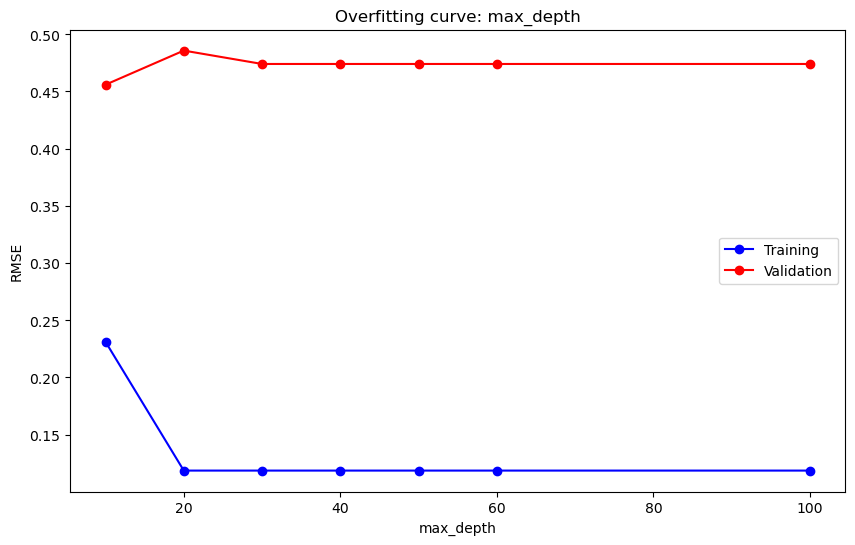

In [49]:
test_param_and_plot('max_depth', [10,20,30,40,50,60,100])

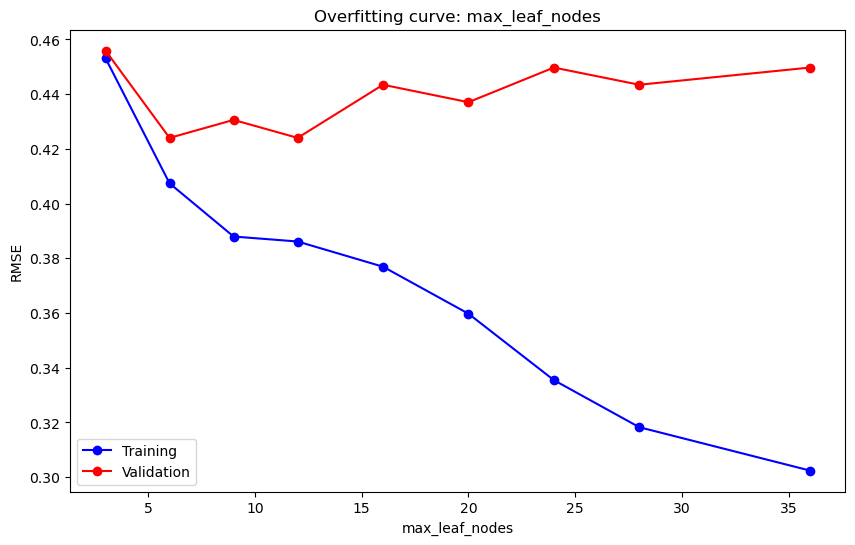

In [50]:
test_param_and_plot('max_leaf_nodes', [3,6,9,12,16,20,24,28,36])

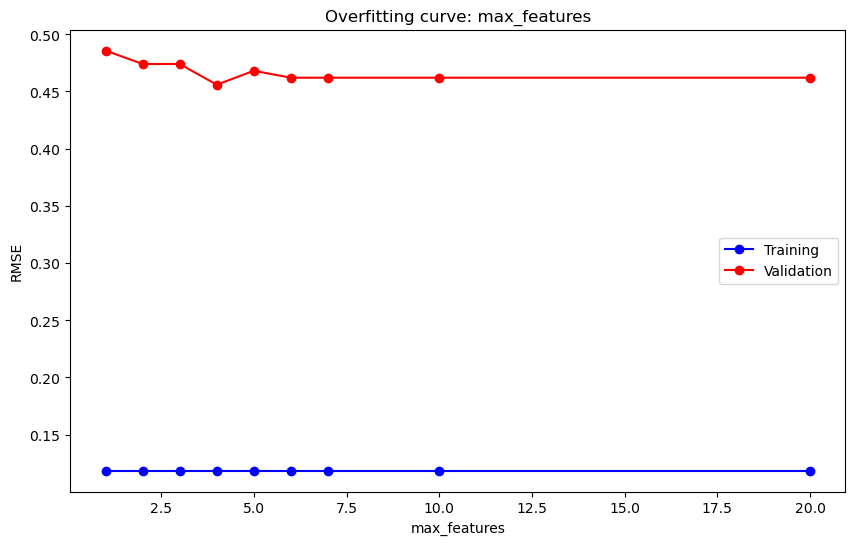

In [51]:
test_param_and_plot('max_features', [1,2,3,4,5,6,7,10,20])

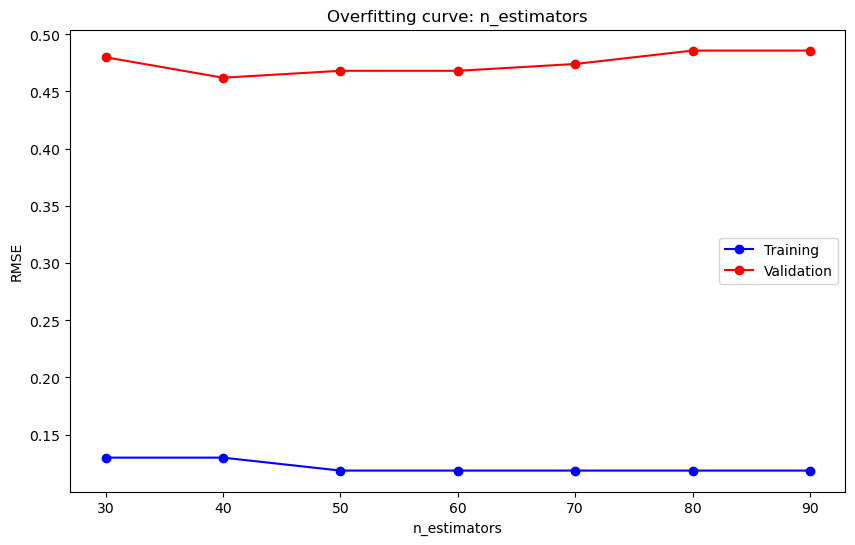

In [52]:
test_param_and_plot('n_estimators', [30,40,50,60,70,80,90])

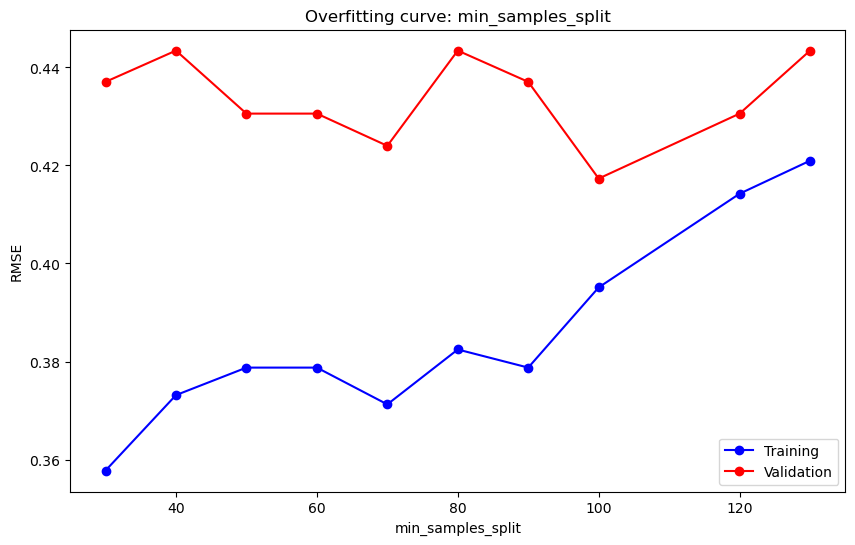

In [53]:
test_param_and_plot('min_samples_split', [30,40,50,60,70,80,90,100,120,130])

## Final Model Trainning and Prediction

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Initialize a decision tree classifier
clf2 = RandomForestClassifier(max_depth = 25, max_leaf_nodes=12,max_features=4, n_estimators=50,min_samples_split=70, random_state=42)

In [56]:
# Train the decision tree classifier
clf2.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=25, max_features=4, max_leaf_nodes=12,
                       min_samples_split=70, n_estimators=50, random_state=42)

In [57]:
print(test_df_copy.shape)
print(train_inputs.shape)

(418, 7)
(889, 7)


In [58]:
from sklearn.metrics import accuracy_score


In [59]:
test_df_copy = test_df_copy[train_inputs.columns]

In [60]:
# Make predictions on the test set
test_pred = clf2.predict(test_df_copy)

In [61]:
test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
test_df_PassengerID

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [63]:
# Create a DataFrame with 'PassengerId' and 'y_pred'
predictions_df = pd.DataFrame({'PassengerId': test_df_PassengerID, 'Survived': test_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('Survival_Predictions.csv', index=False)

In [64]:
predictions_df.shape

(418, 2)